In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv("Data_Extraction_&_Cleaning\data\Postgres\counts_&_income_under300k.csv")

columns = df.columns.tolist()

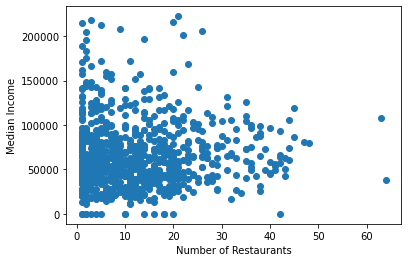

In [2]:
plt.scatter(df["count"], df["median"])
plt.xlabel('Number of Restaurants')
plt.ylabel('Median Income')
plt.show()

In [3]:
X = df["count"].values.reshape(-1, 1)

In [4]:
y = df["median"]

In [5]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [6]:
y_pred = model.predict(X)
print(y_pred.shape)

(808,)


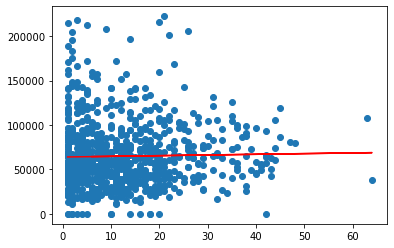

[76.61651833]
63997.94148818986


In [7]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

print(model.coef_)
print(model.intercept_)

#Our y=mx+b slope equation is Median Income = 63998 + 76*Number of Restaurants

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
from keras.models import load_model
classifier = LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred = classifier.predict(X_test)
results=pd.DataFrame({"Prediction":y_pred, "Actual":y_test}).reset_index(drop=True)
results.head(30)

,Prediction,Actual
0,67557.548966,50724
1,63939.426978,96094
2,65035.827580,46897
3,64268.347158,53793
4,64706.907399,37854
5,63720.146857,52769
6,63281.586616,80713
7,65145.467640,30036
8,63610.506797,27995
9,62952.666435,214767


In [12]:
#where our below errors stem from
print("y_pred = ", type(y_pred))
print("y_test = ",type(y_test))

y_pred =  <class 'numpy.ndarray'>
y_test =  <class 'pandas.core.series.Series'>


In [13]:
classifier.score(X, y)

-5.203812000420527e-06

In [14]:
# The coefficients
print("Coefficients: \n", classifier.coef_)

Coefficients: 
 [109.64006025]


In [15]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

Mean squared error: 1737172630.89
Coefficient of determination: -0.0064
